## Libraries and data for real model

In [ ]:

from google.colab import drive
from tensorflow.python.ops.nn_ops import softmax
from keras import backend as k
import numpy as np
from matplotlib.gridspec import GridSpec
from IPython import display
from scipy.optimize import linprog
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import numpy as np
import matplotlib. pyplot as plt
from keras.layers import Activation,Dense,Input,BatchNormalization,Dropout,Conv1D,Flatten,MaxPool1D,Dot,Reshape,Conv2D,Concatenate,ReLU,Lambda,MaxPooling2D,Normalization
import cvxpy as cp
import tensorflow as tf
from keras import Model
from IPython import display
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import warnings
import pandas as pd
from IPython import display
path='/content/drive/MyDrive/Maestría/Optimización/Data/'
from keras.models import Sequential
mse=mean_squared_error
mae=mean_absolute_error
mape=mean_absolute_percentage_error
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
import pandas as pd
import scipy.io as sio
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.callbacks import Callback
from typing import Tuple
import matplotlib.pyplot as plt

import os
os.chdir('/content/drive/Shareddrives/red_gas_col/Prueba')
from My_Functions.Object1 import Evaluate,FlyEvaluate
from My_Functions.model_real_data import flow_model, plots, gen_w, plot_time, ng_case_evaluate, ng_evaluate_atip, visualize_atipic, visualize_non_convergence, identify_atypical_values, dynamic_val, loss_val, bounded

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Objective 2

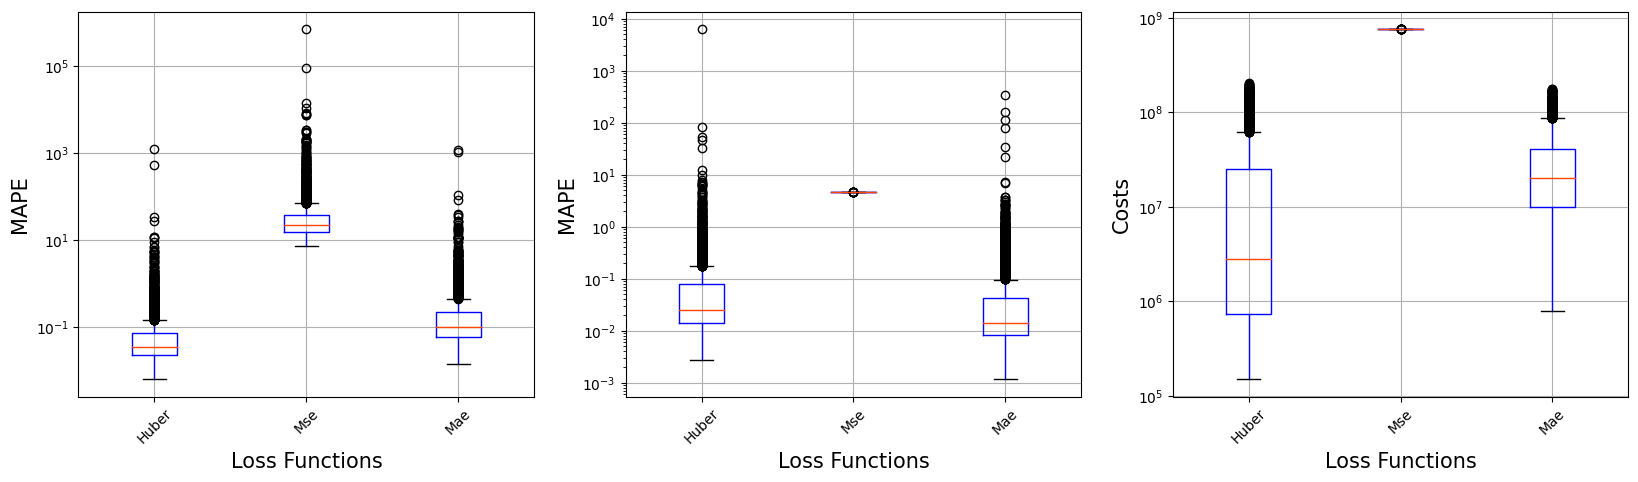

In [ ]:
loss_val()

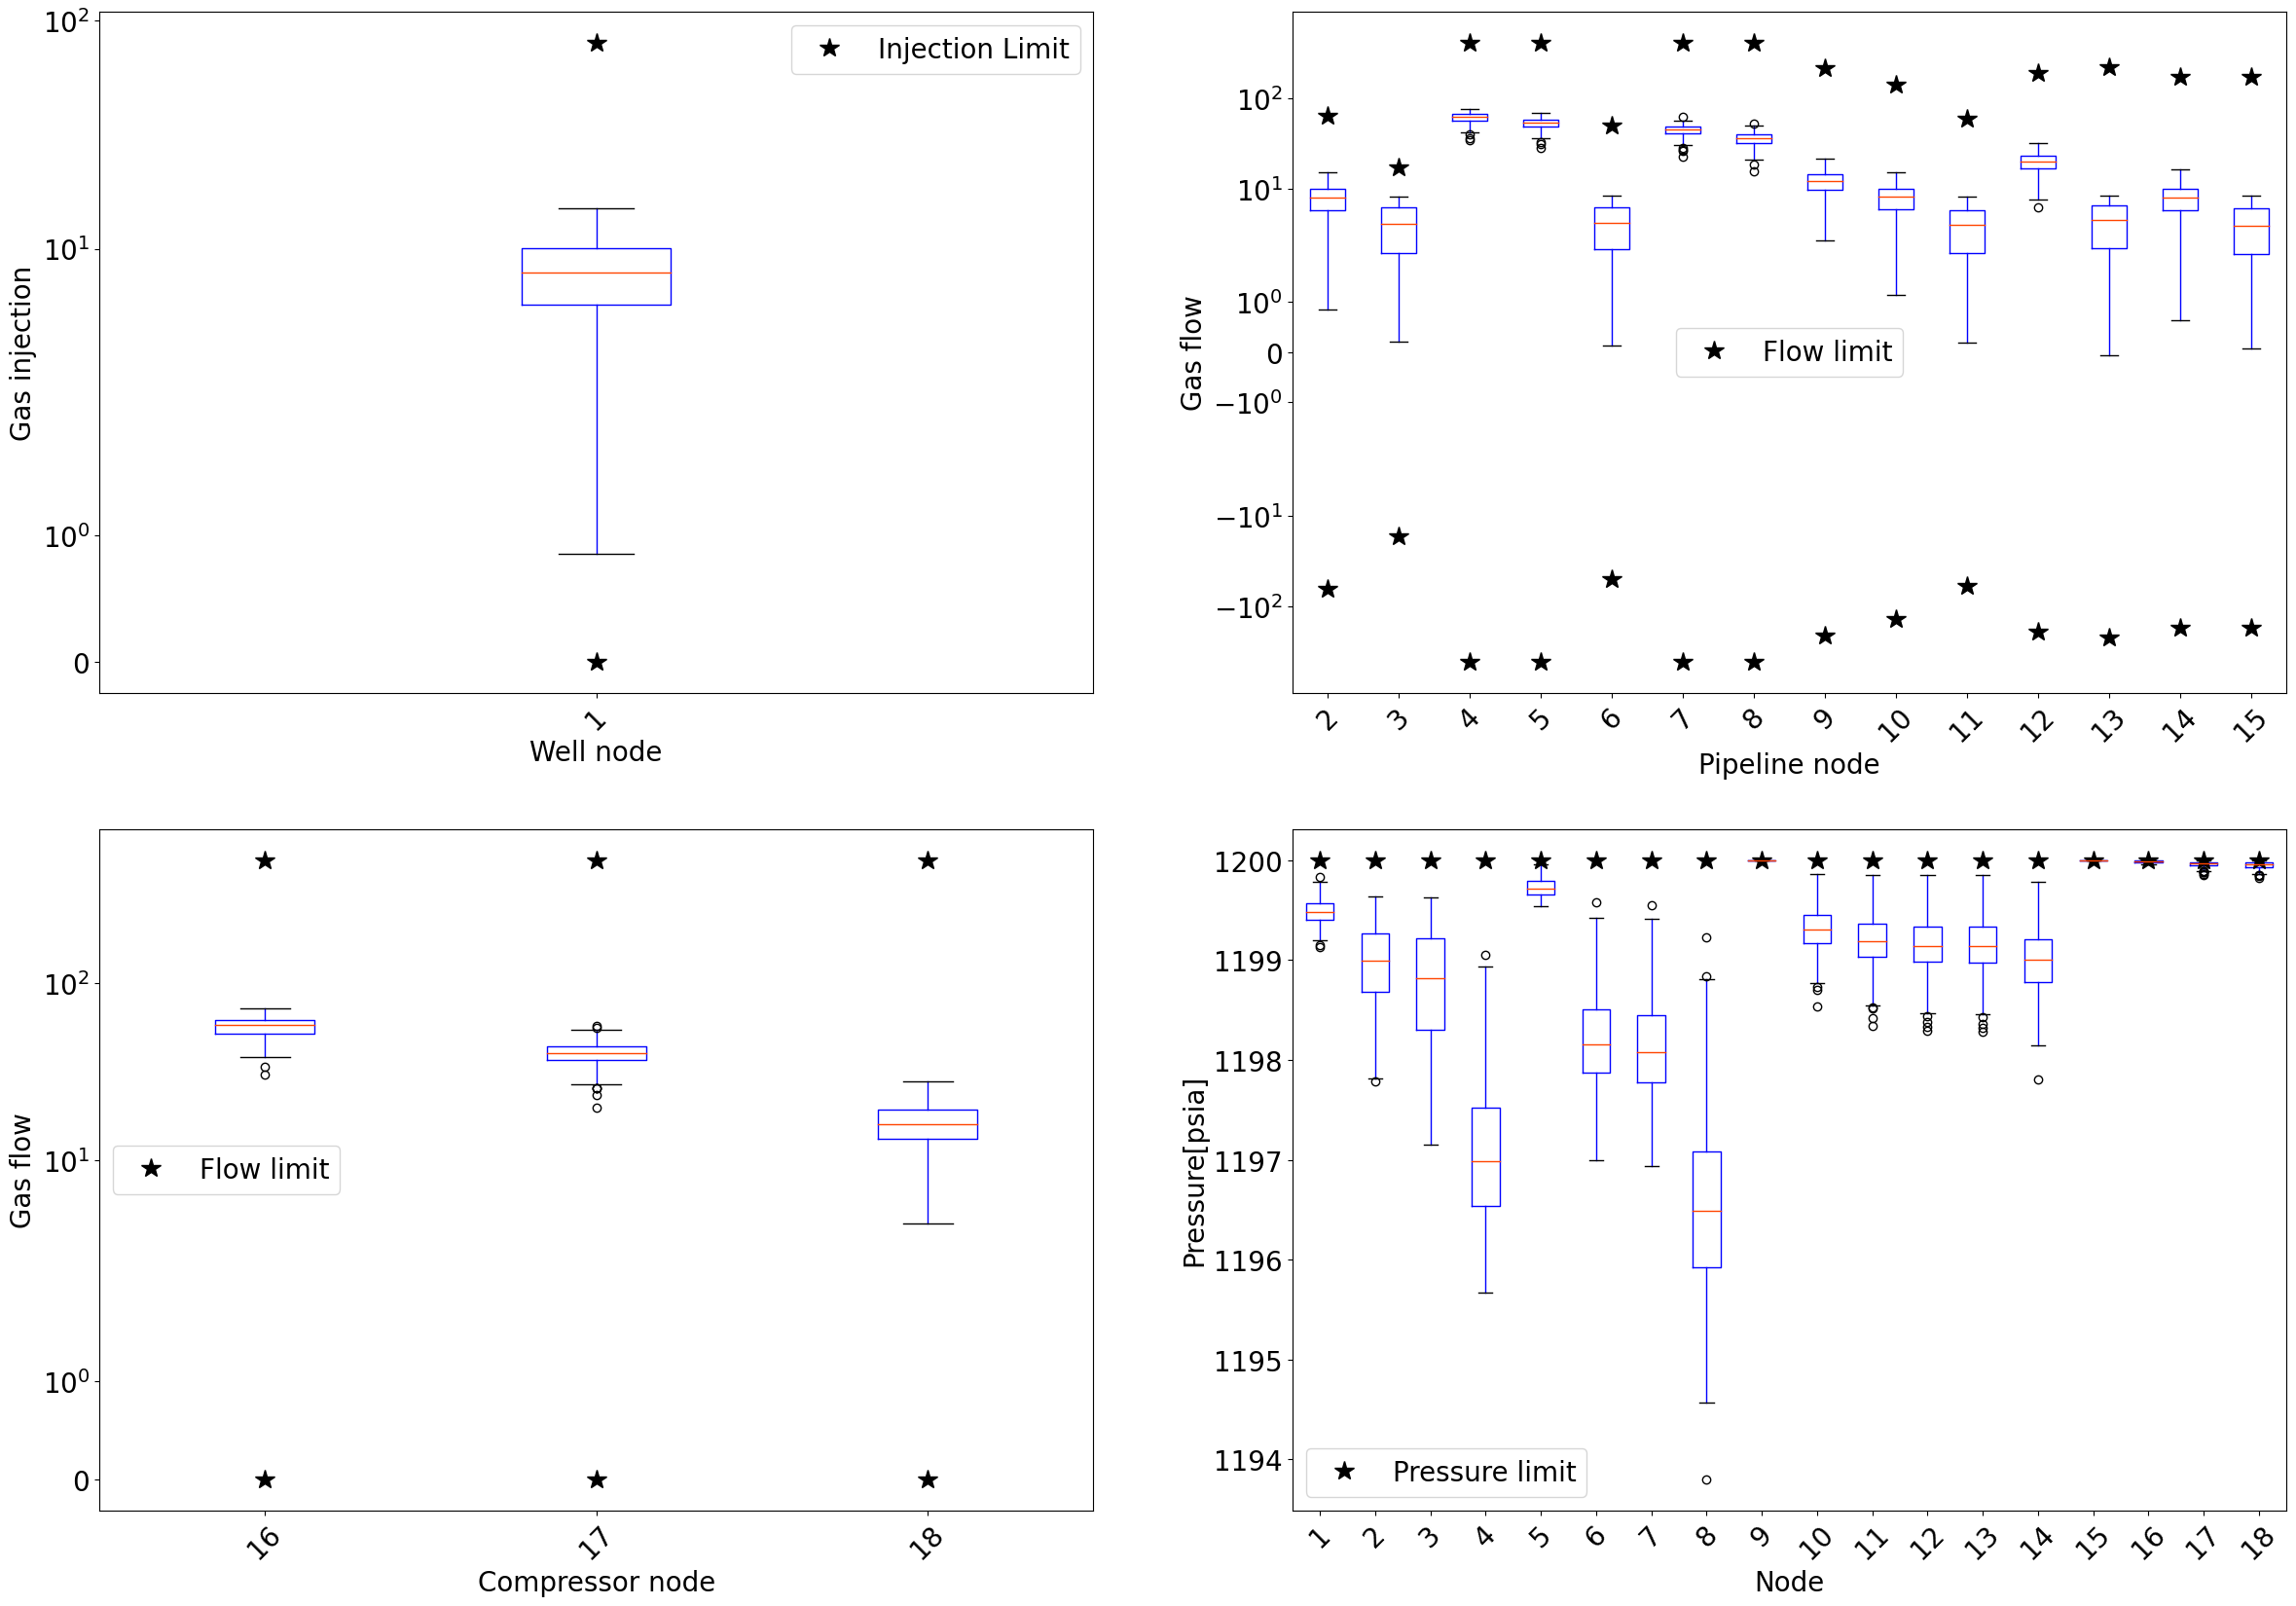

In [ ]:
bounded(s=1)

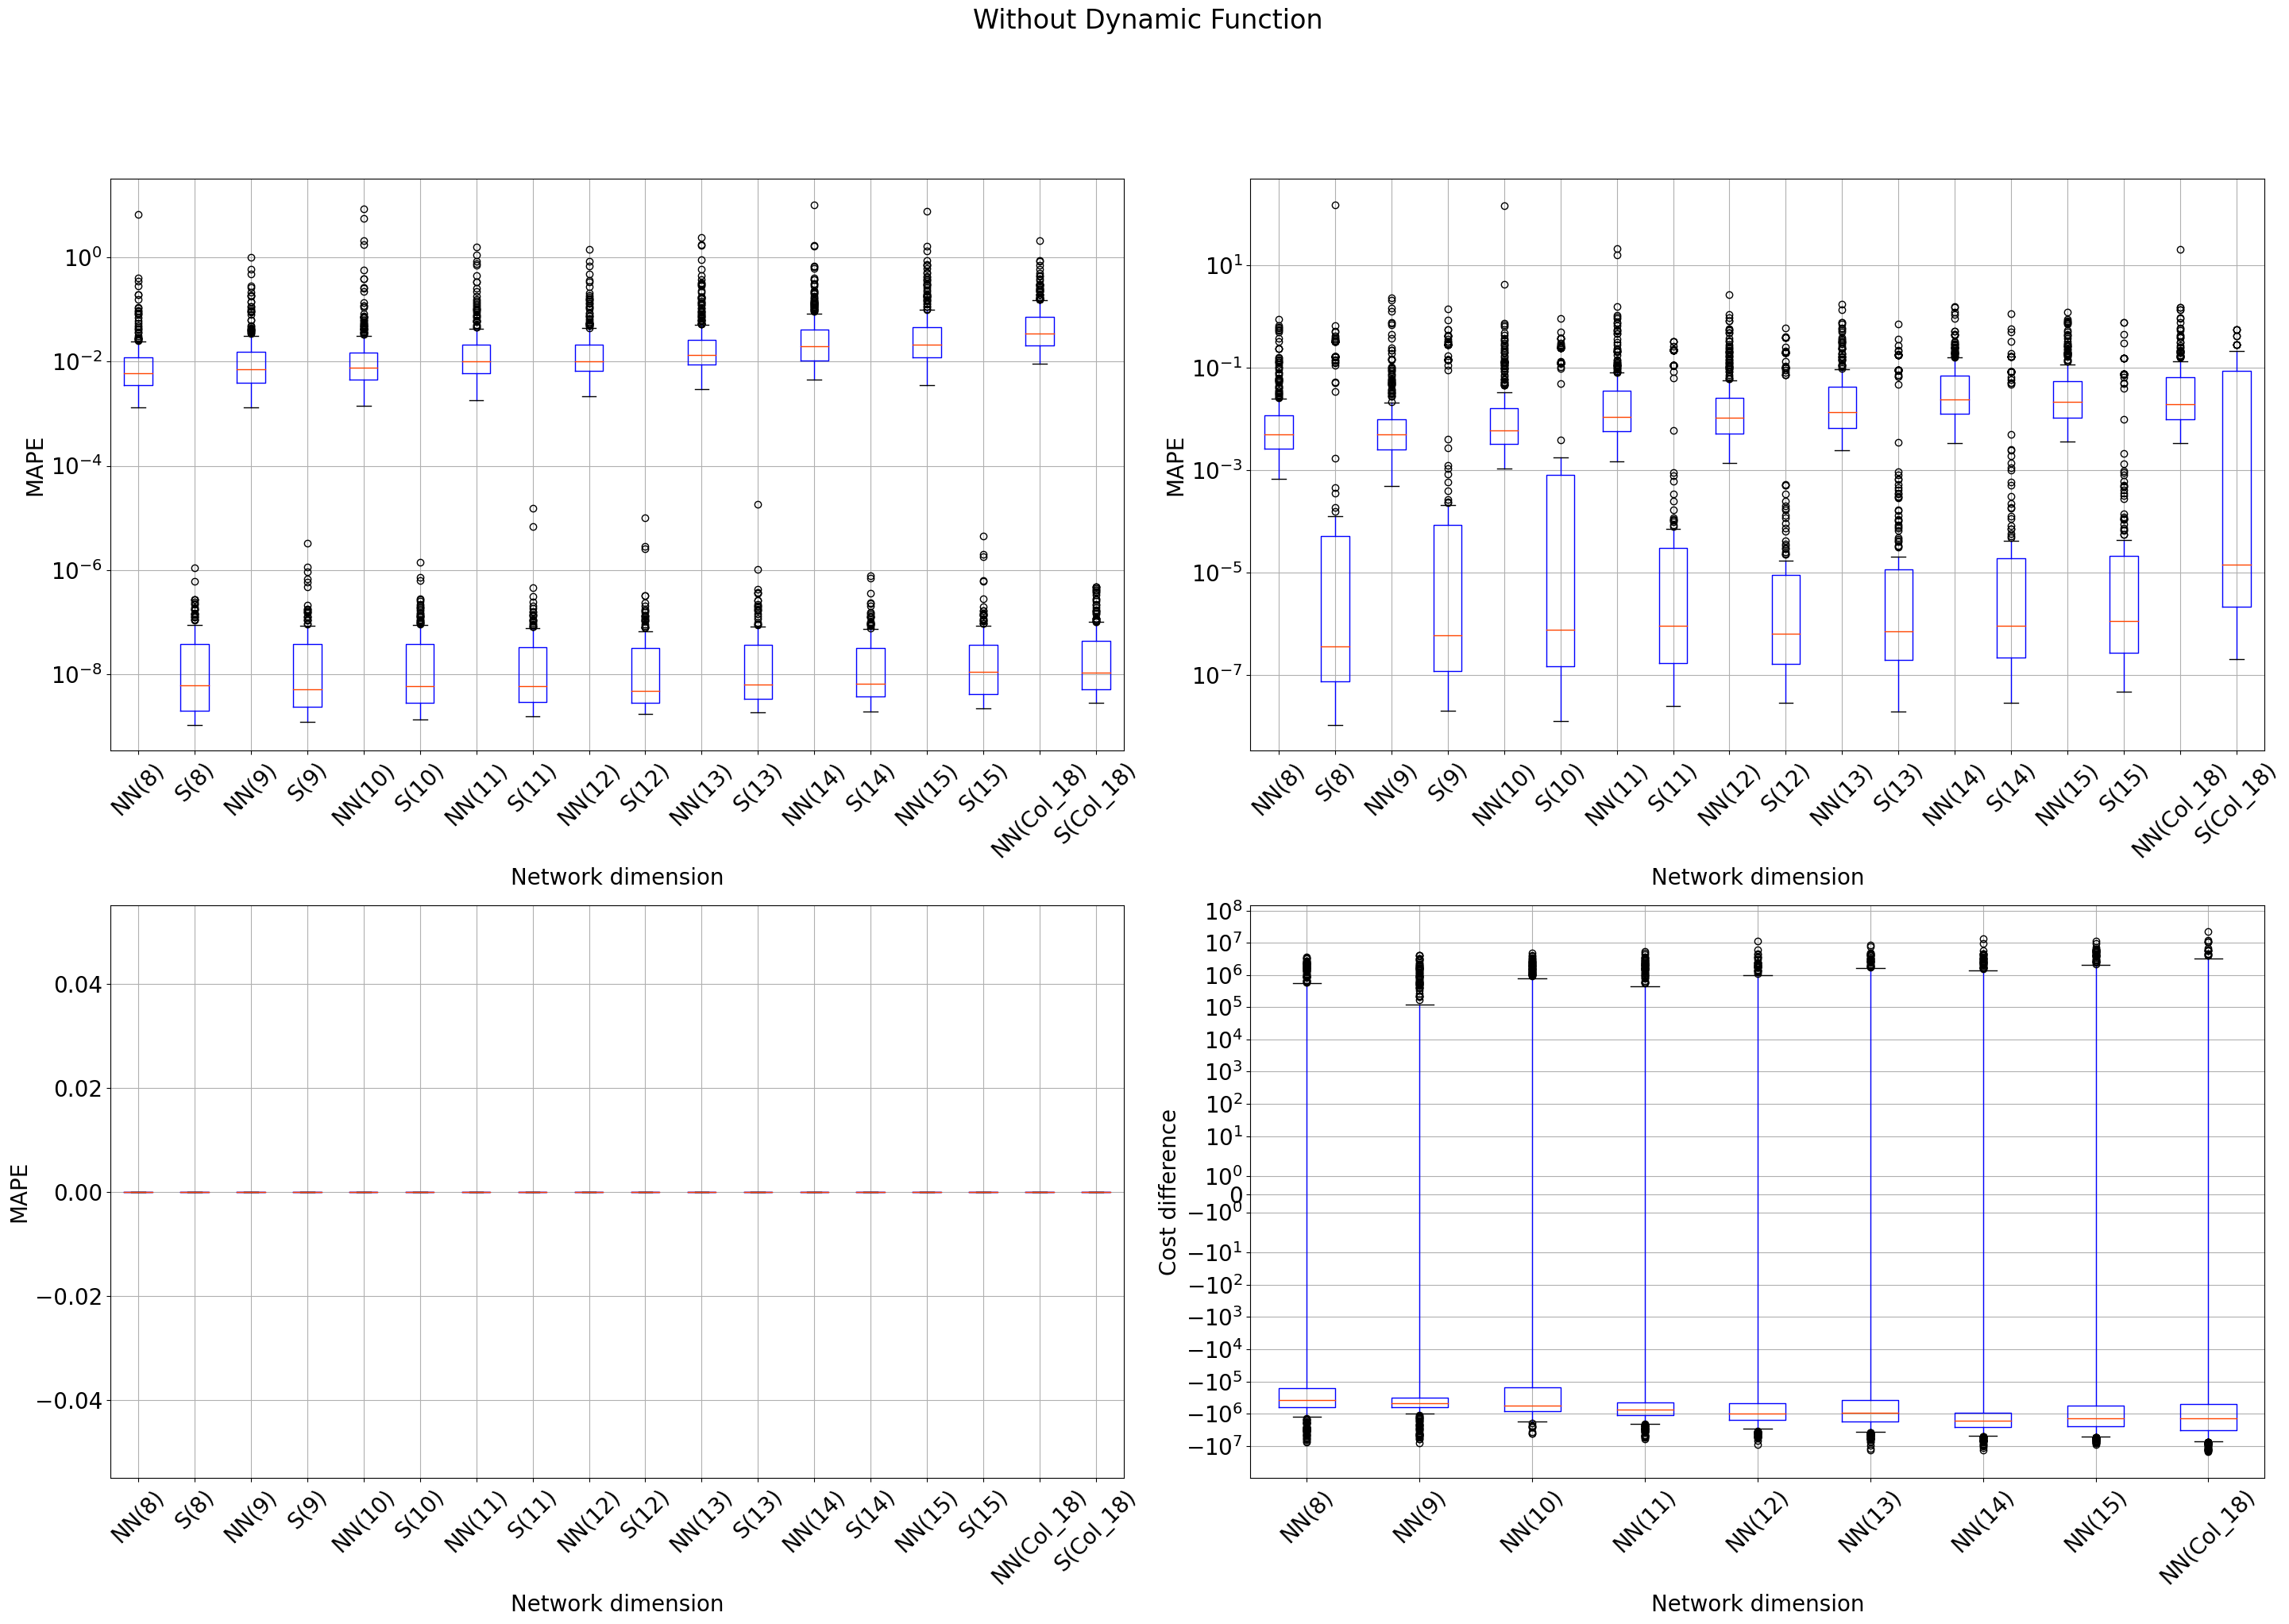

In [ ]:
Balance,Weymouth,PjPi,Costos=ng_case_evaluate(s=0)

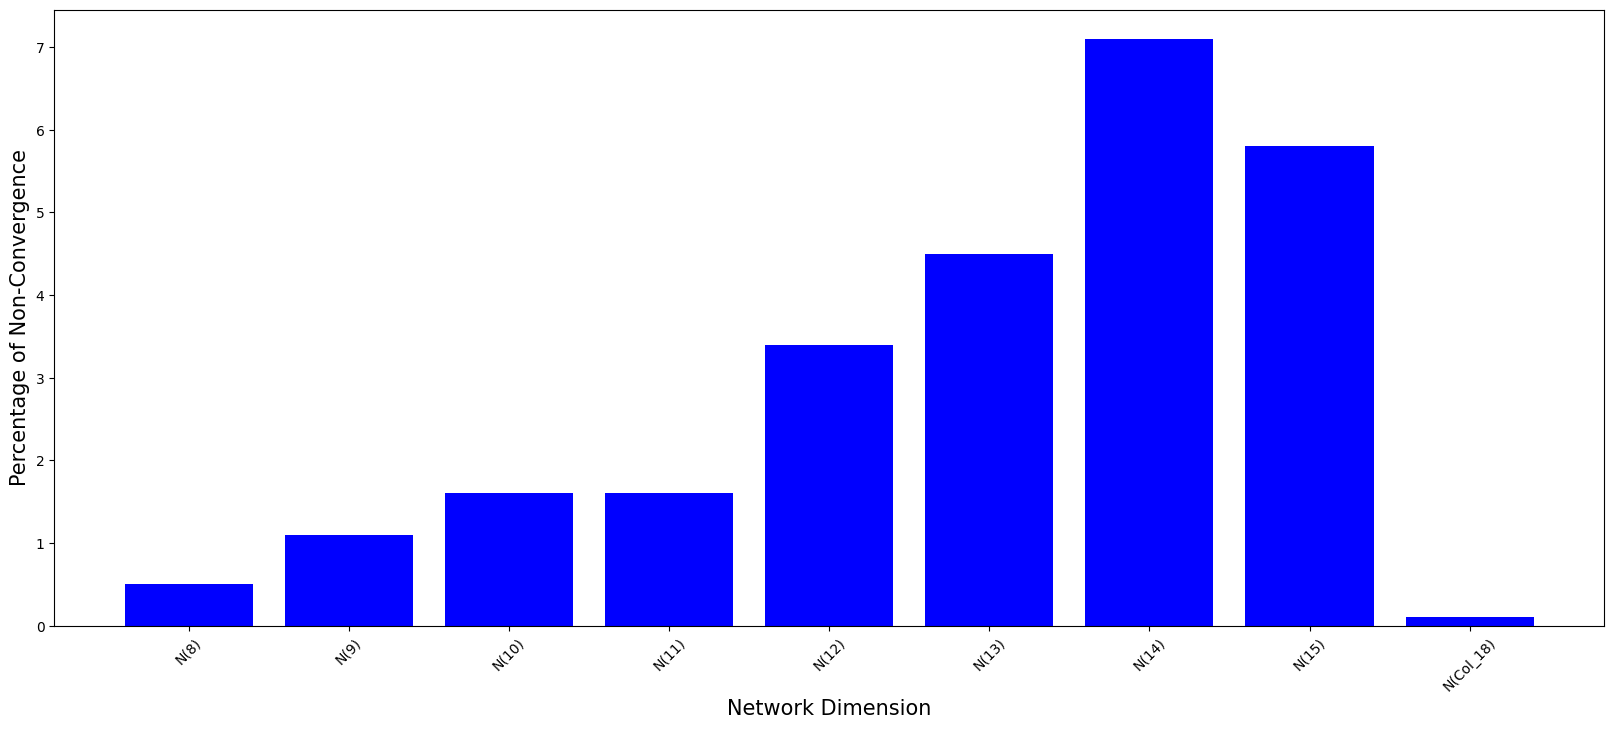

In [ ]:
visualize_non_convergence()

# objective 3

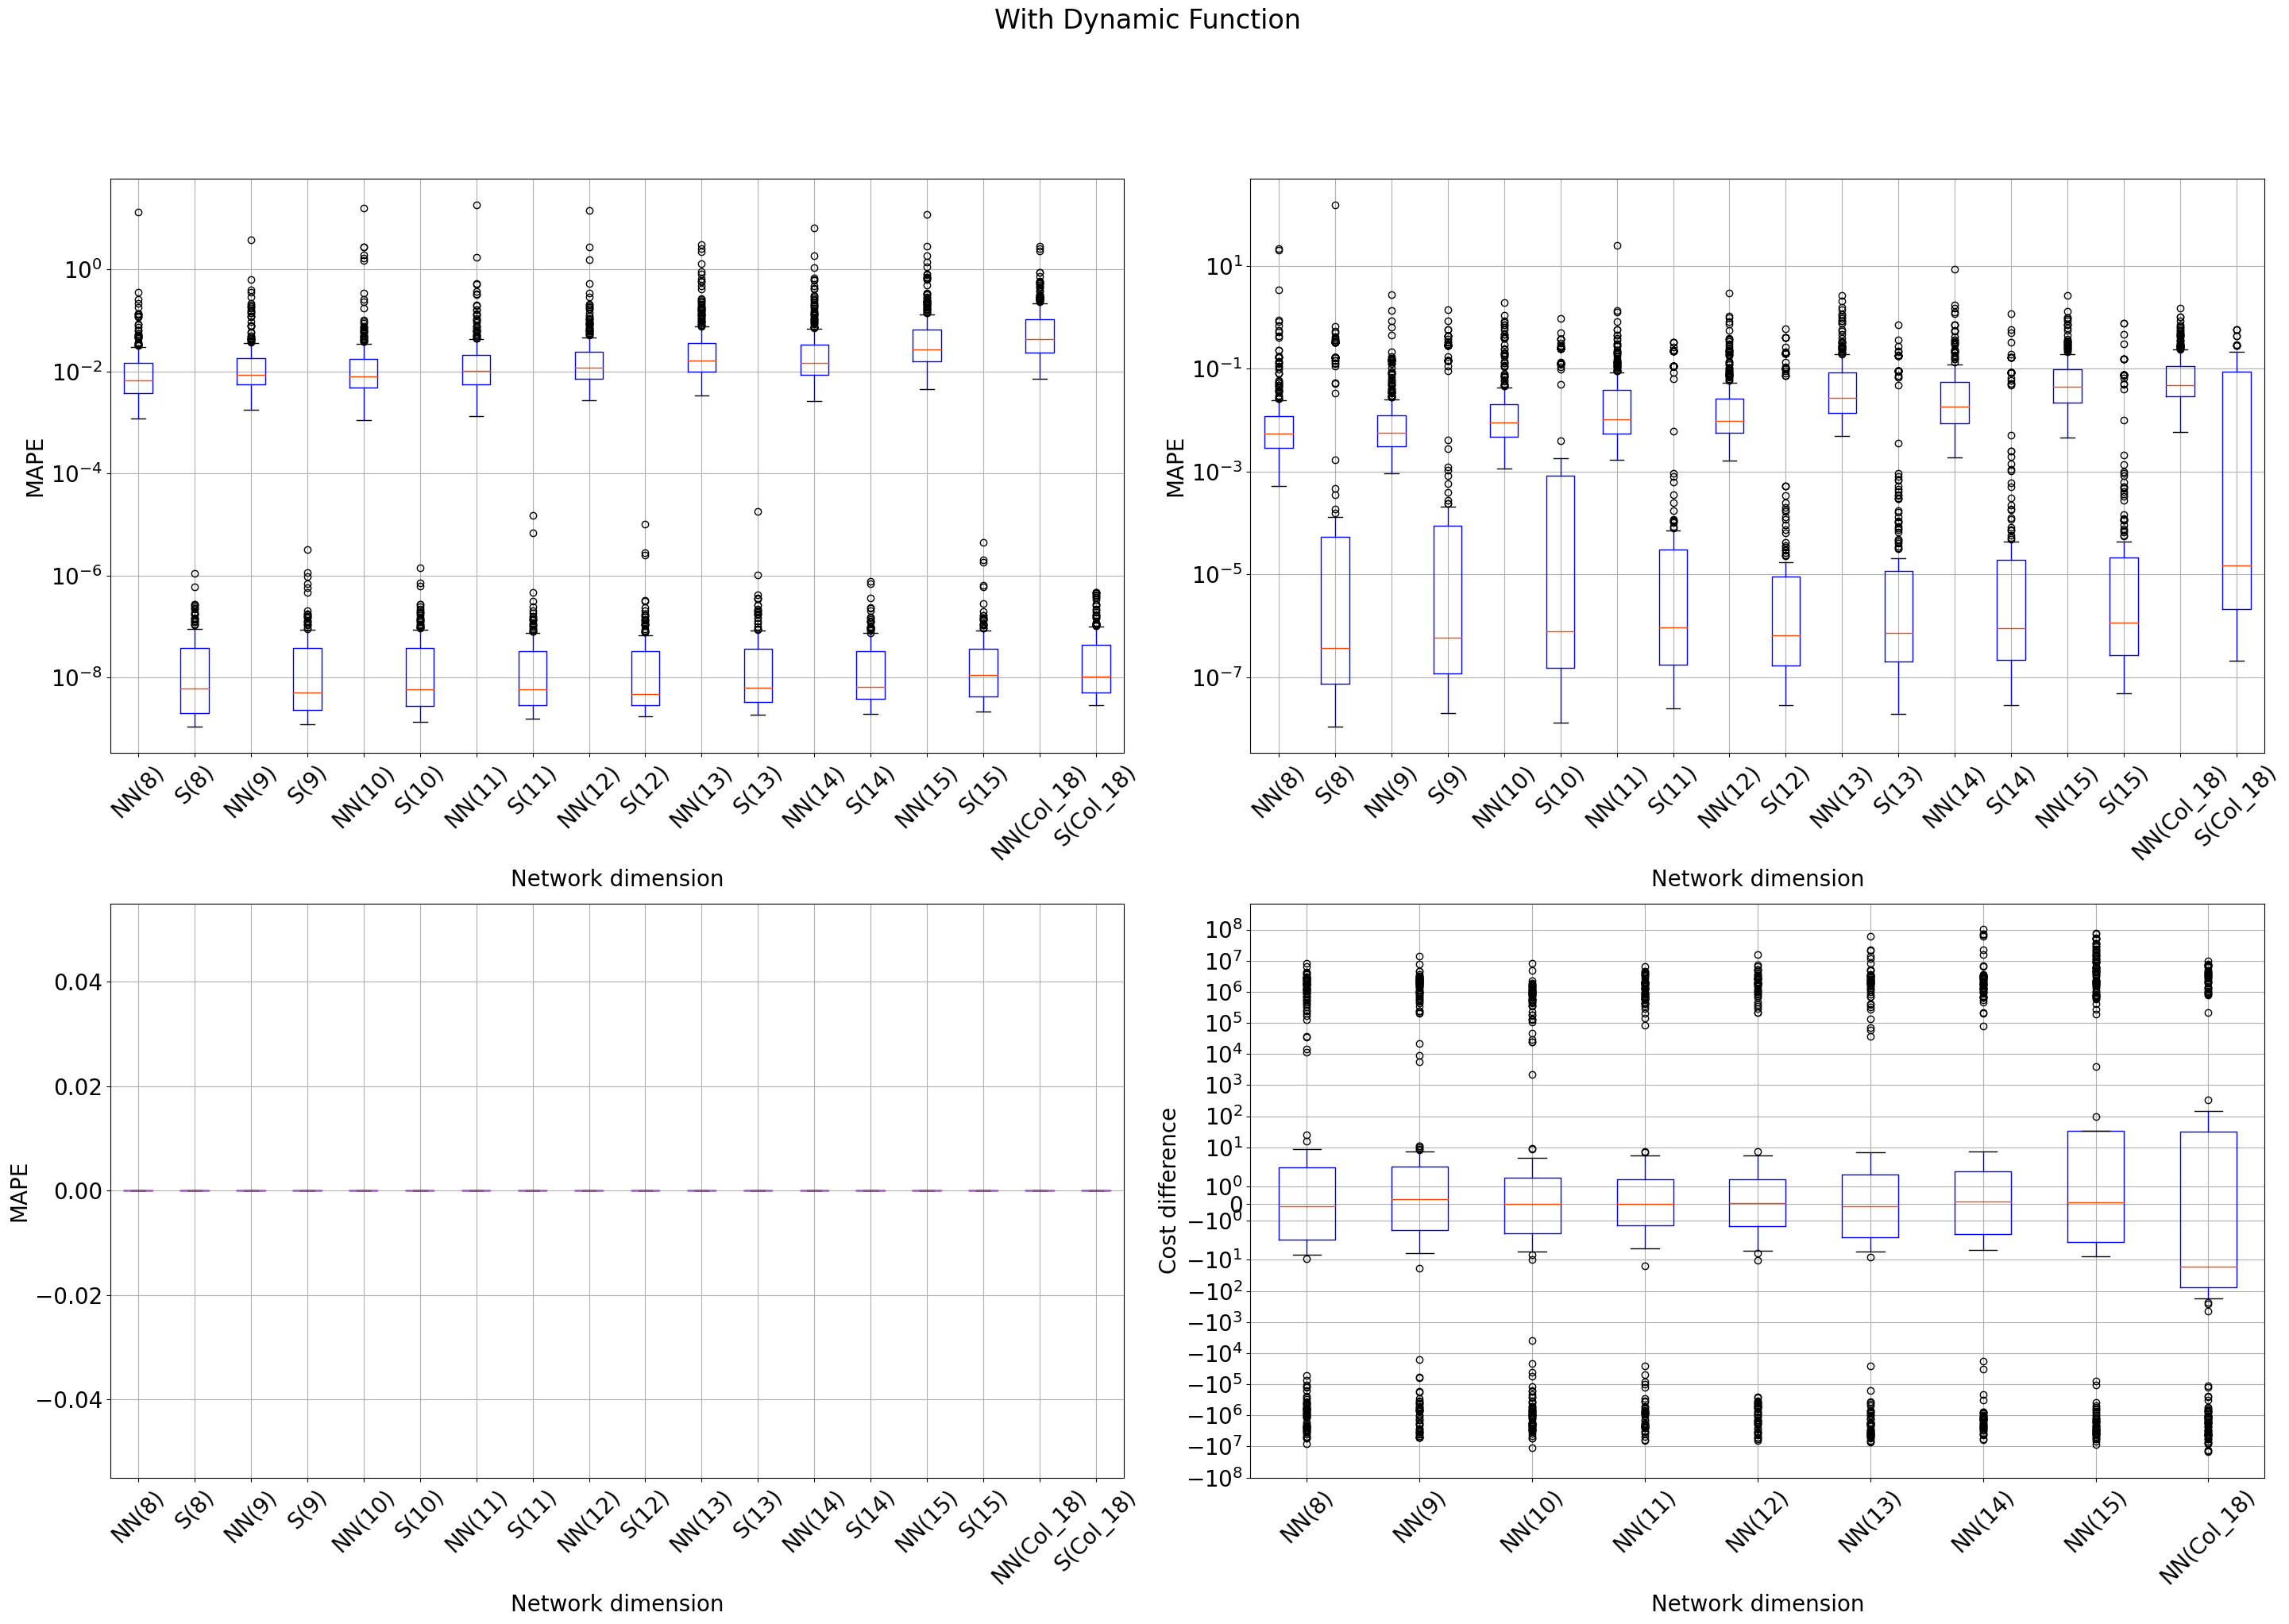

In [ ]:
Balance,Weymouth,PjPi,Costos= ng_case_evaluate(s=1)

Porcentaje de atípicos: Balance de nodos


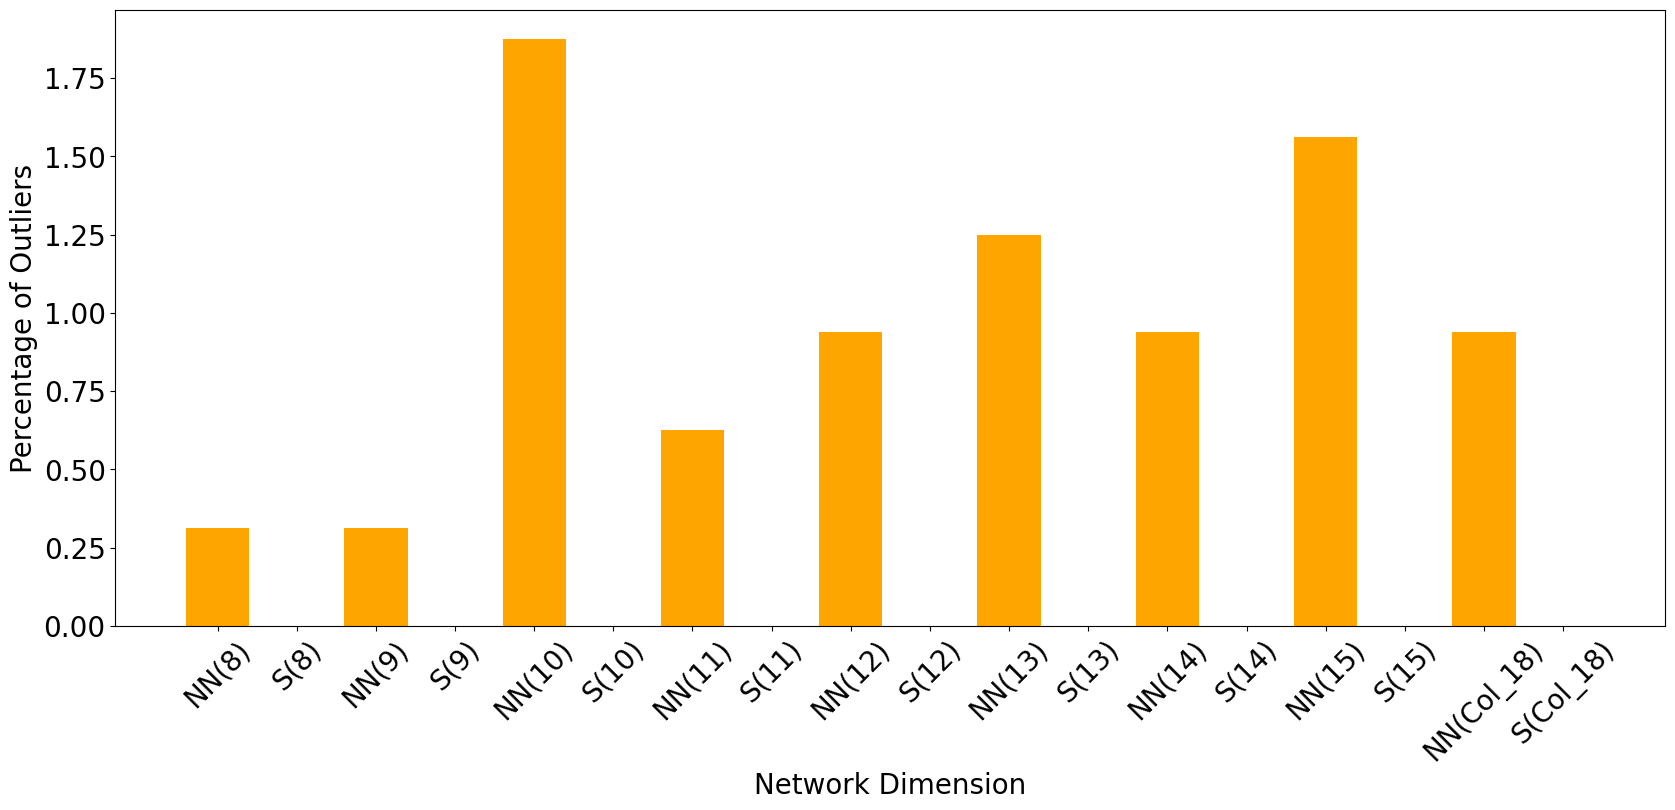

Porcentaje de atípicos: Weymouth


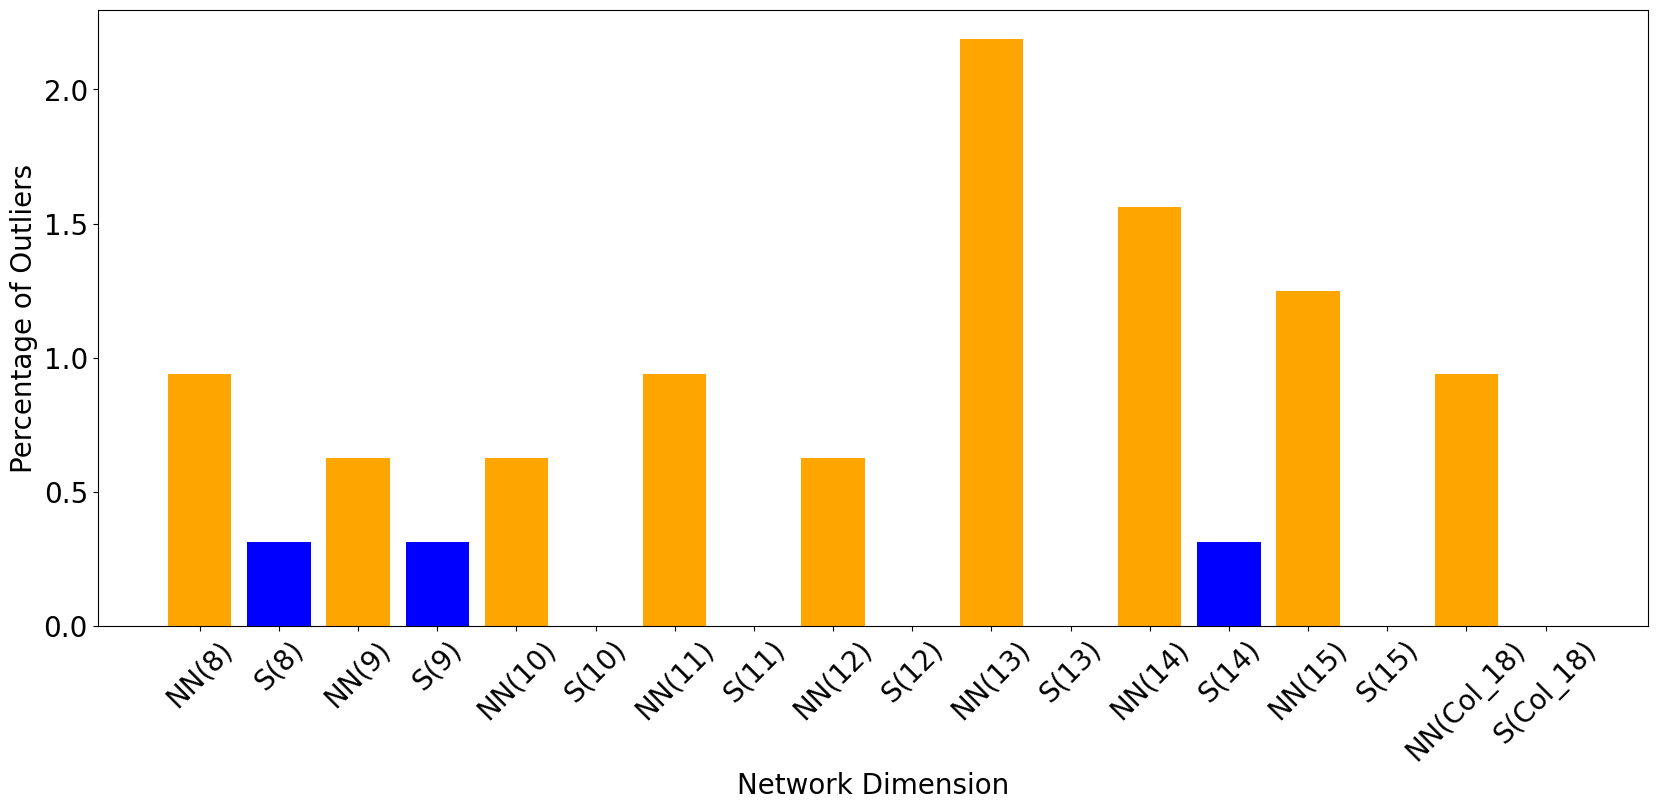

In [ ]:
df=Balance
columnas_red = df.columns#[col for col in df.columns if 'S' in col]
print('Porcentaje de atípicos: Balance de nodos')
visualize_atipic(Balance, columnas_red)
print('Porcentaje de atípicos: Weymouth')
visualize_atipic(Weymouth, columnas_red)

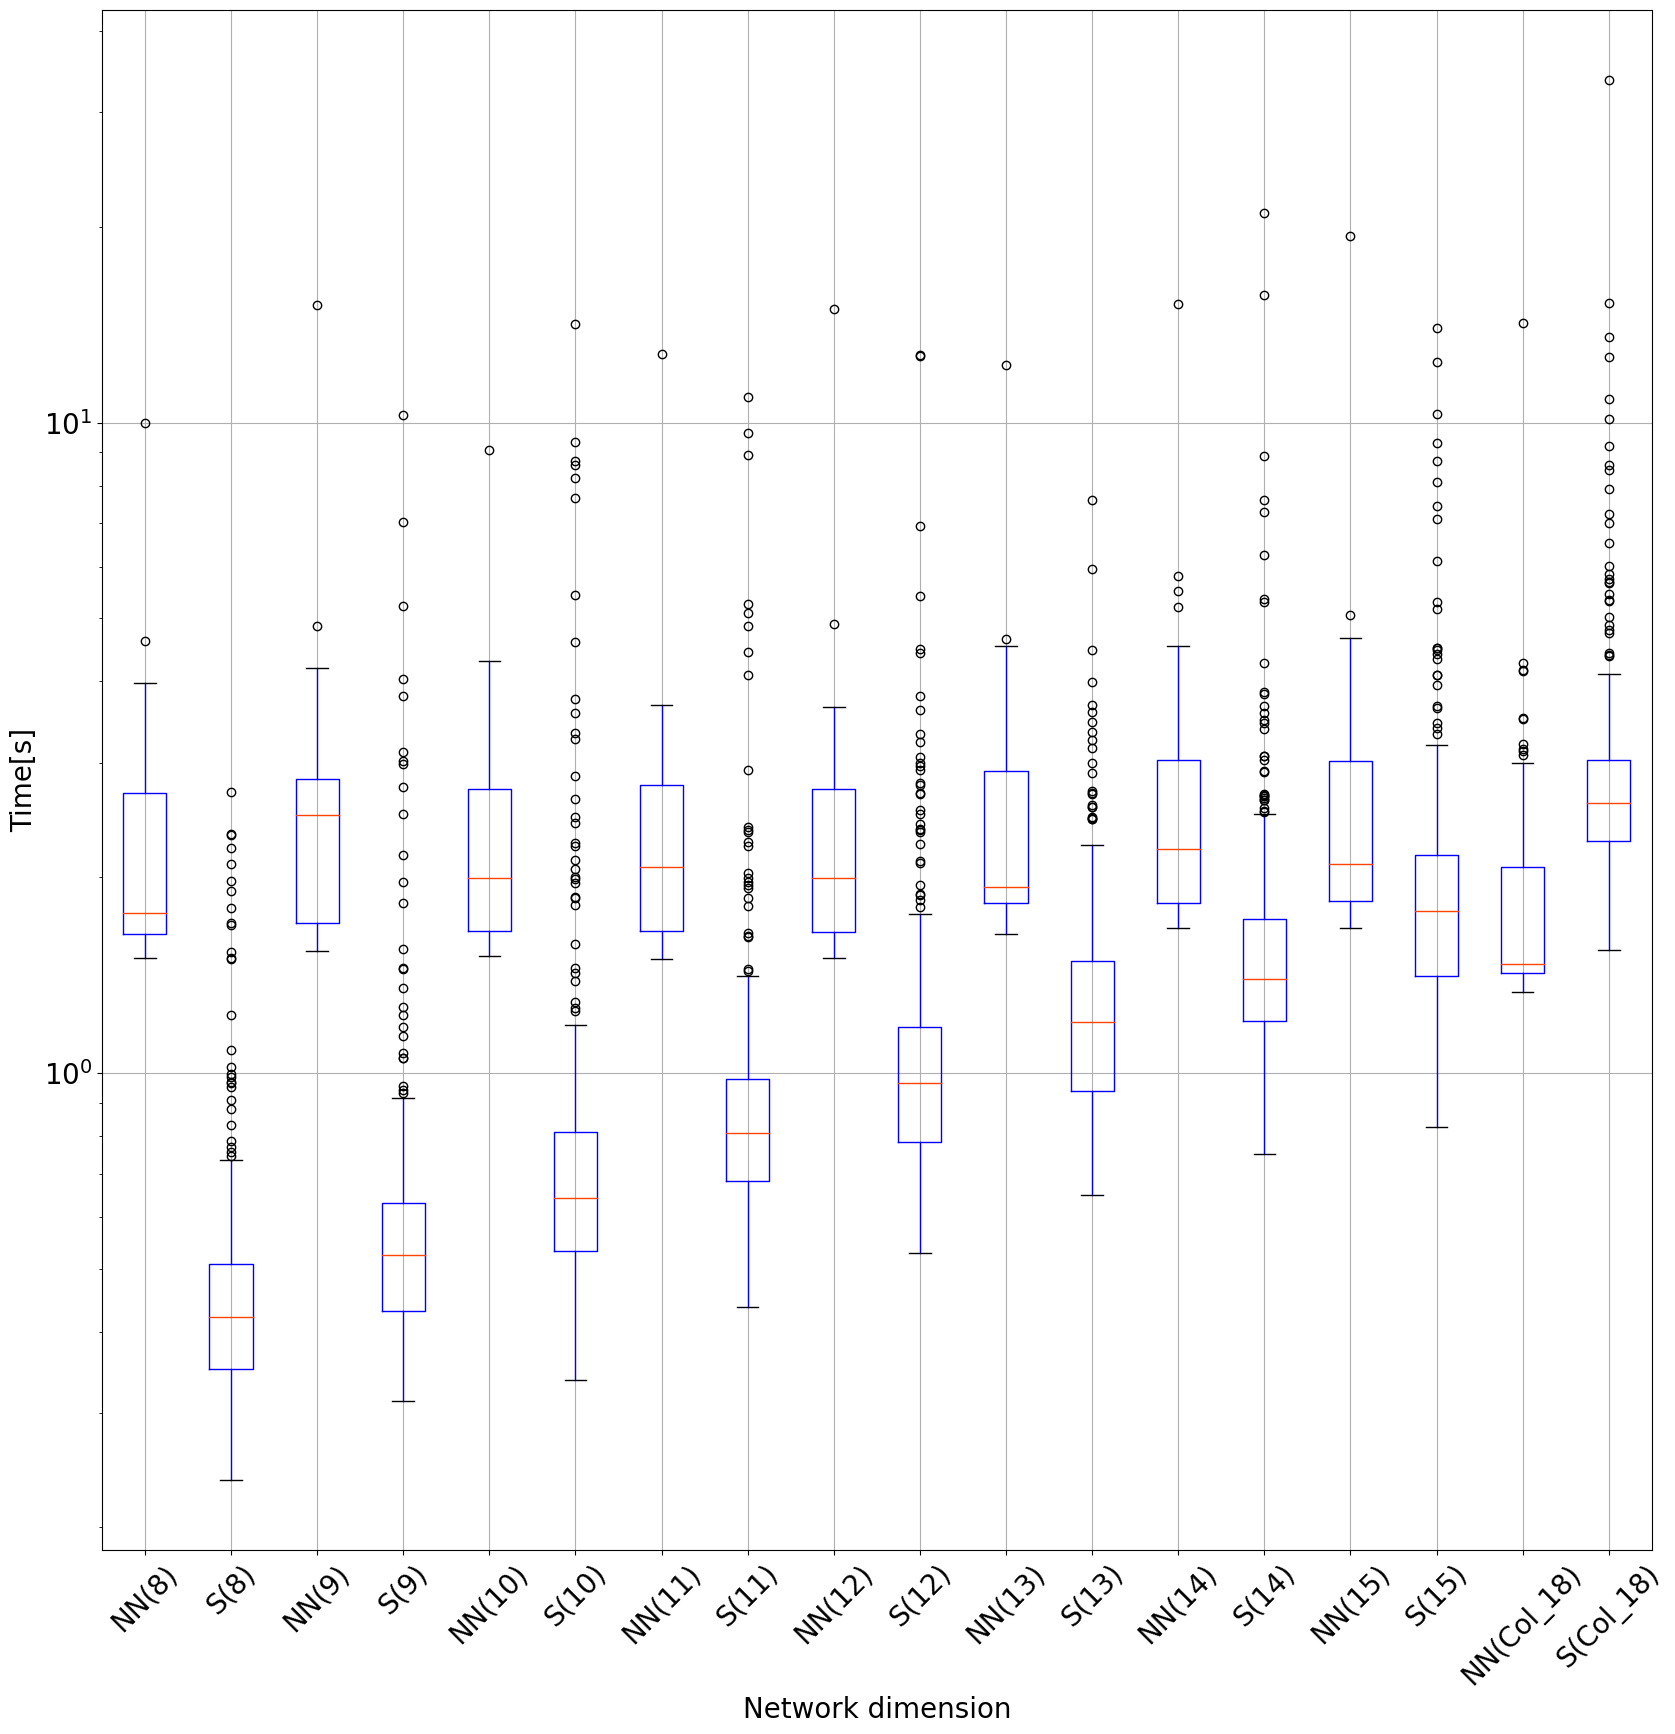

In [ ]:
a=plot_time(s=1)

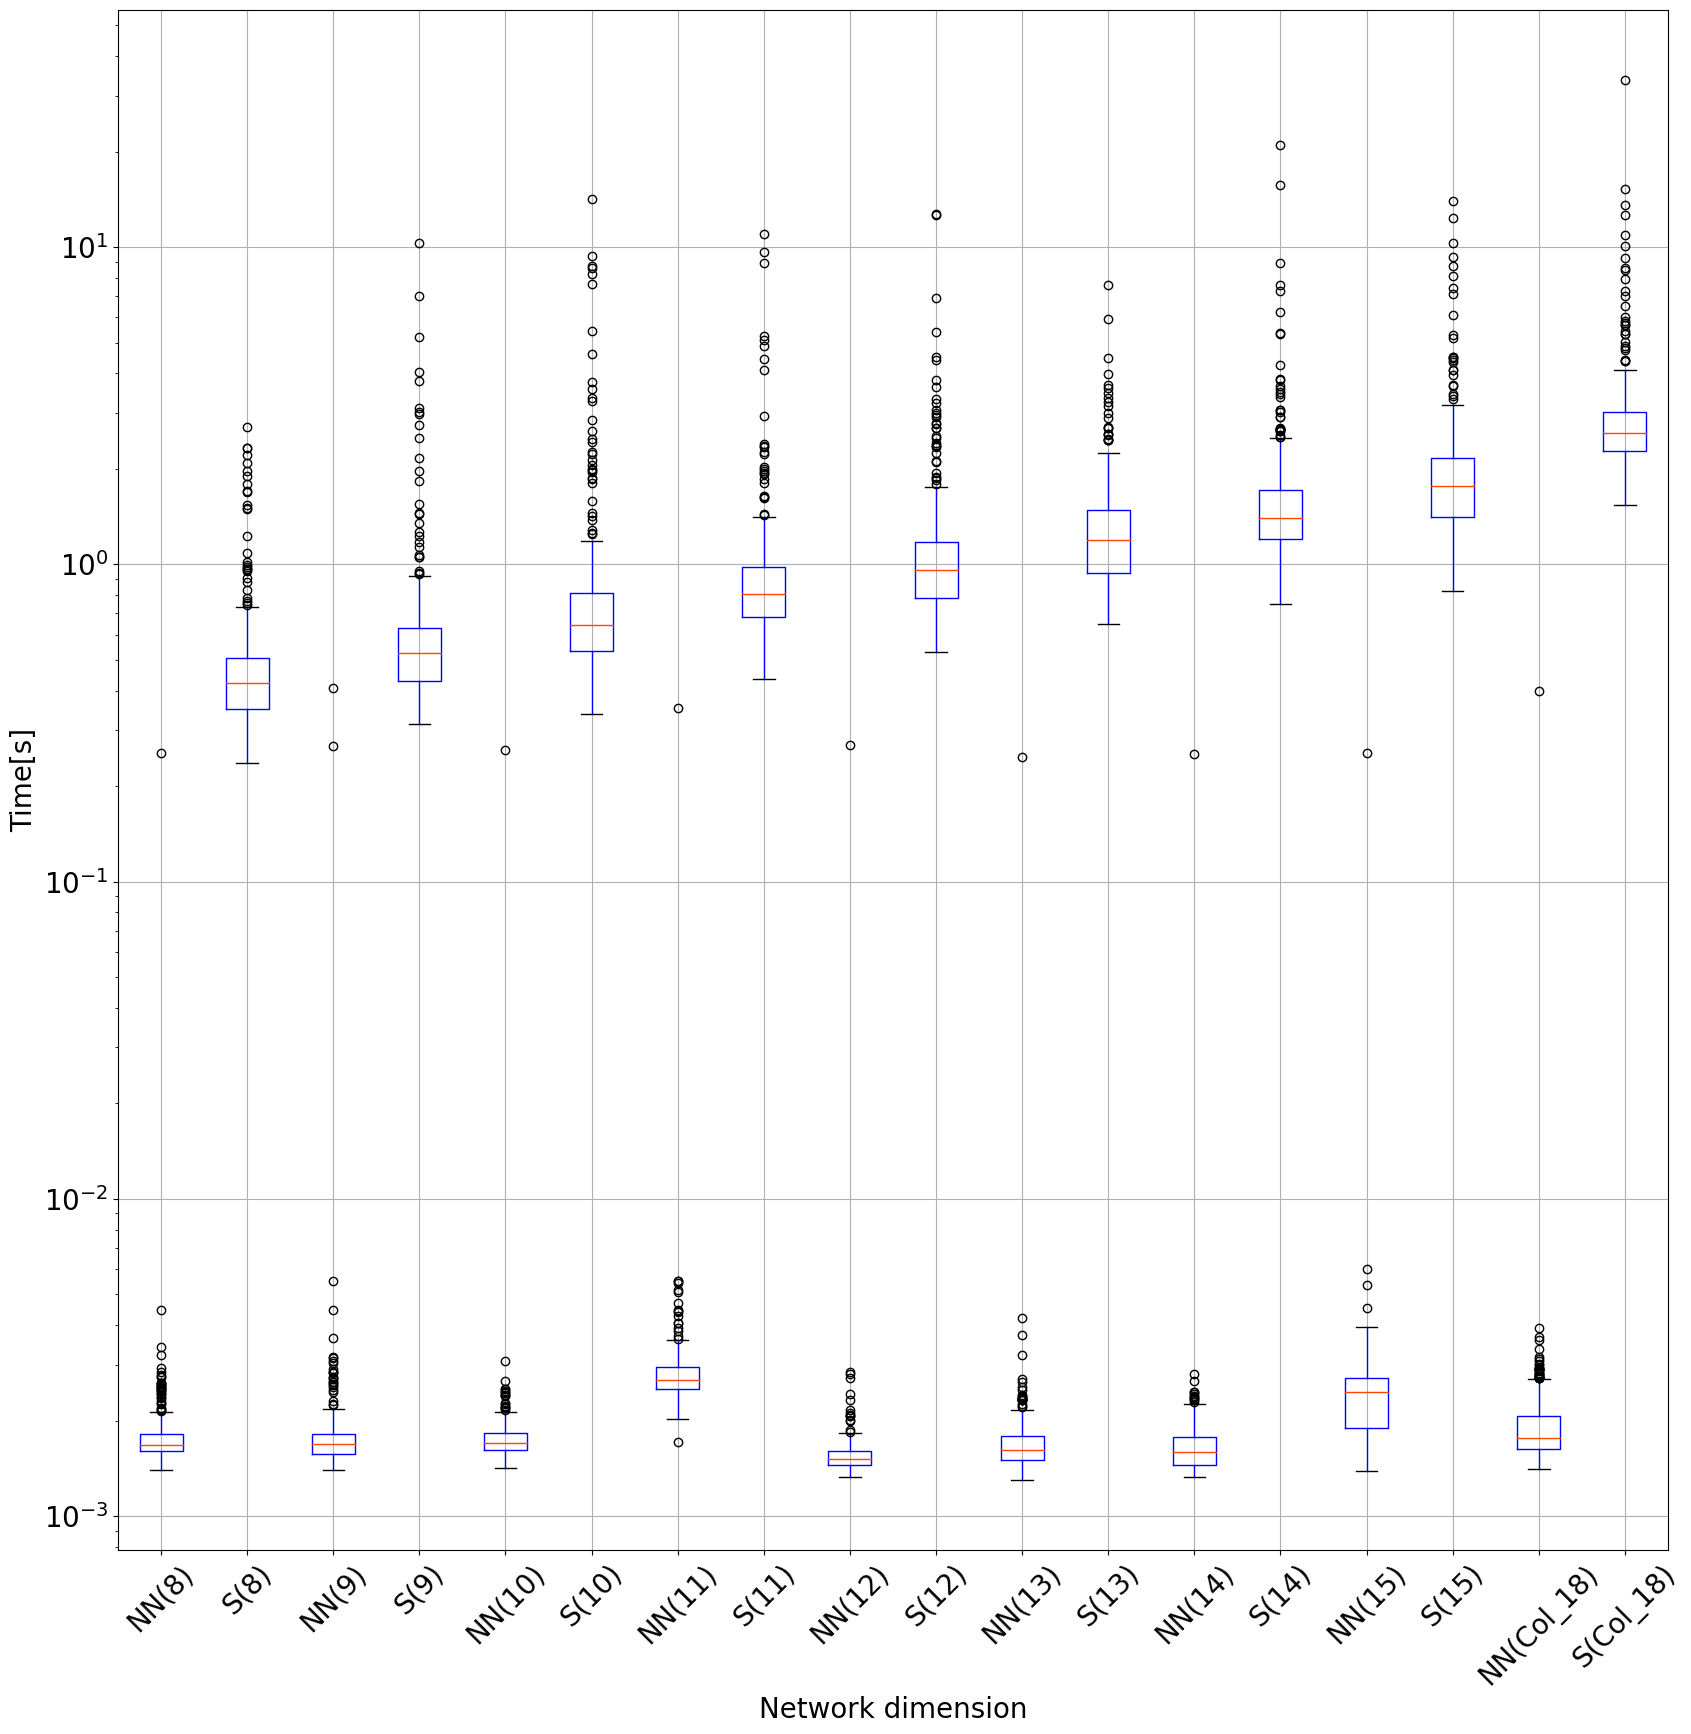

In [ ]:
a=plot_time('predict',s=1)

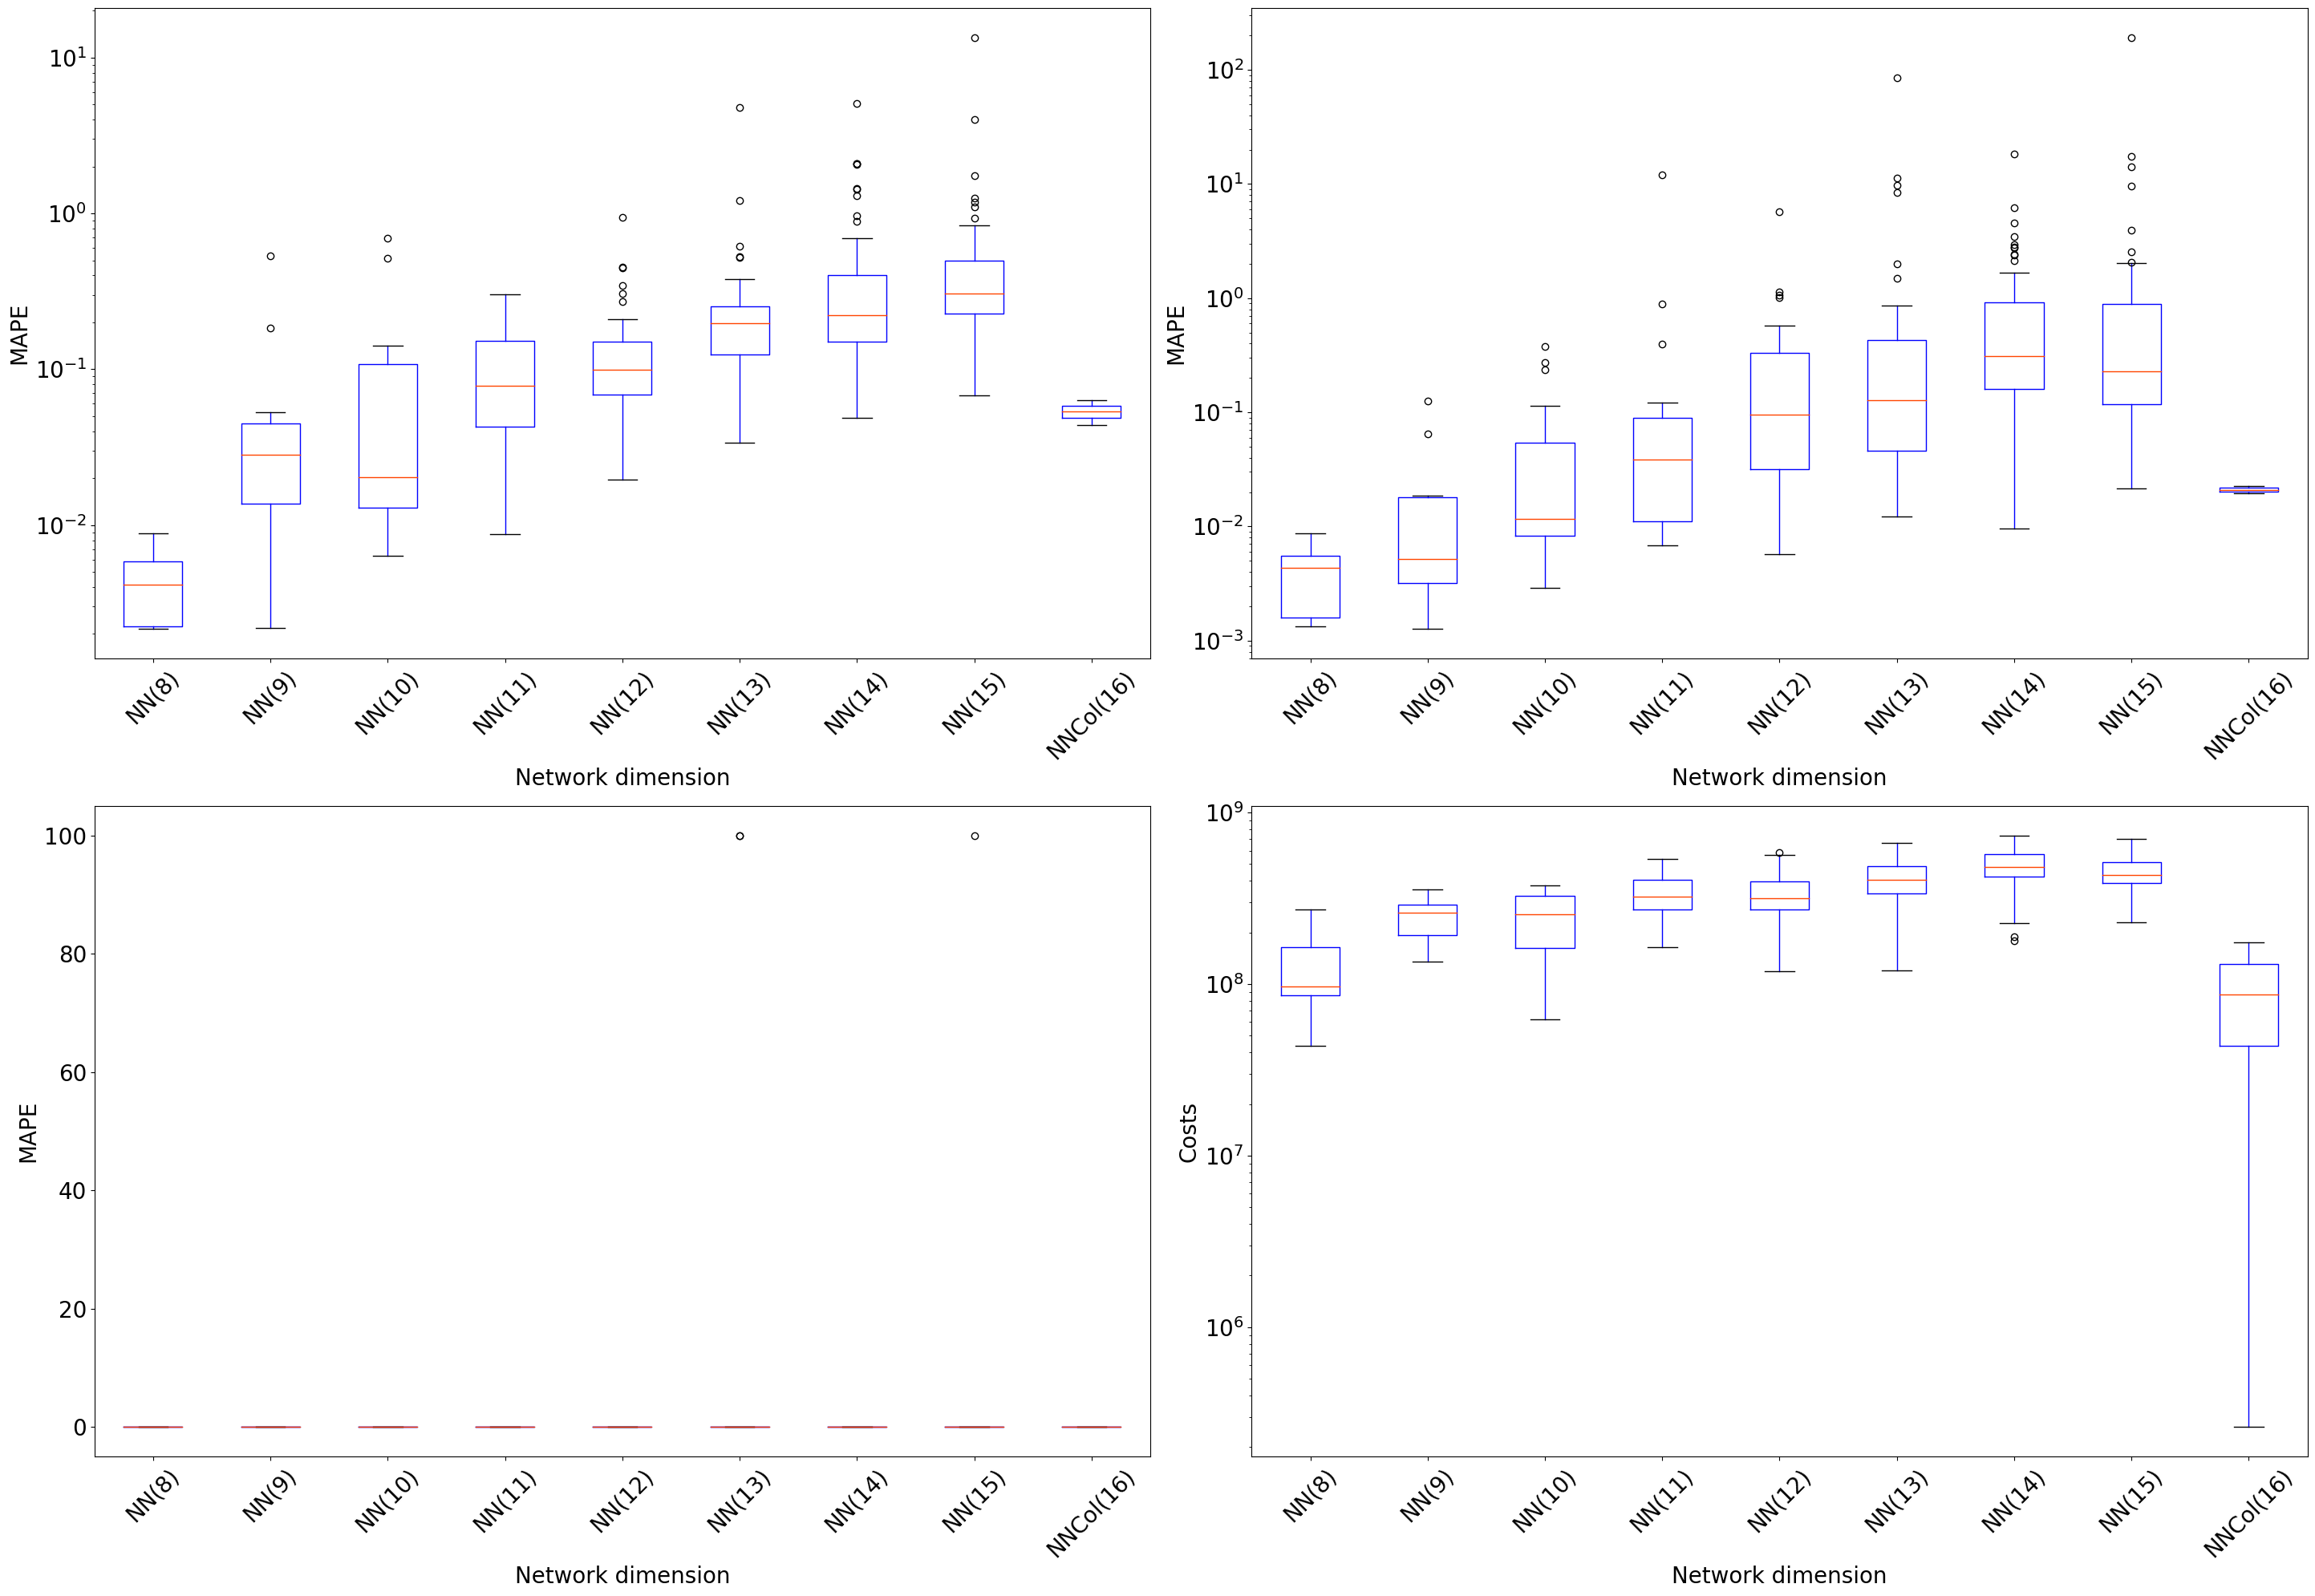

In [ ]:
Bal,Wey,_,_=ng_evaluate_atip(s=1)

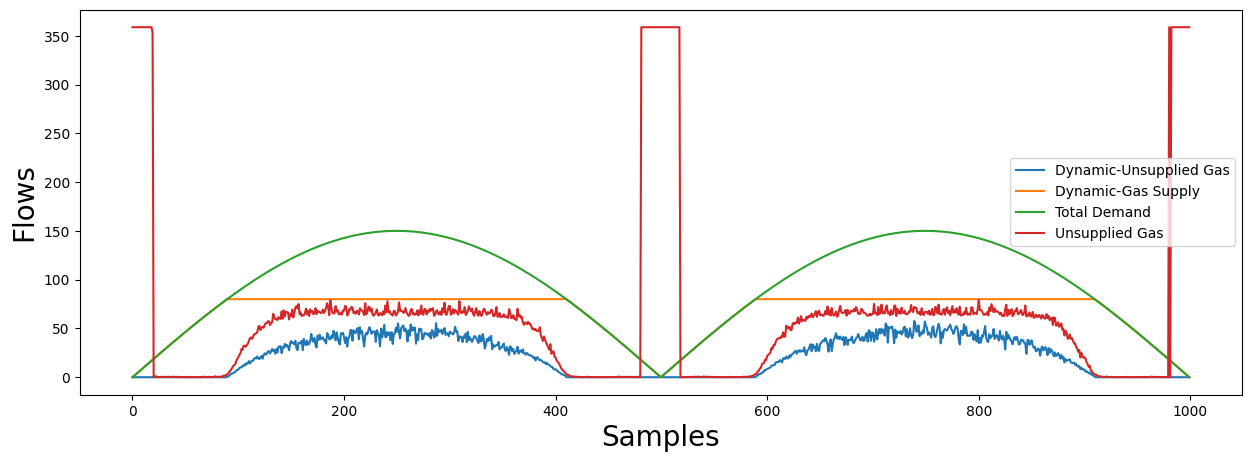

In [ ]:
dinamic = dynamic_val()